In [89]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
path = 'https://mlops-data-course5i13.s3.ap-south-1.amazonaws.com/penguins.csv'

In [91]:
client = boto3.client('s3')

In [92]:
df = pd.read_csv(path)

In [93]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [94]:
data = df.copy()

In [95]:
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Missing Values

In [96]:
data.isna().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [97]:
data = data.dropna()

In [98]:
data.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [99]:
data = data.drop(['rowid','year'],axis=1)

In [100]:
data.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [101]:
data.species = data.species.replace({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})

In [102]:
data.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [103]:
data.island = data.island.replace({'Torgersen':0, 'Biscoe':1, 'Dream':2})

In [104]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,male
1,0,0,39.5,17.4,186.0,3800.0,female
2,0,0,40.3,18.0,195.0,3250.0,female
4,0,0,36.7,19.3,193.0,3450.0,female
5,0,0,39.3,20.6,190.0,3650.0,male


In [105]:
data.sex = data.sex.replace({'male':0, 'female':1})

In [106]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0
1,0,0,39.5,17.4,186.0,3800.0,1
2,0,0,40.3,18.0,195.0,3250.0,1
4,0,0,36.7,19.3,193.0,3450.0,1
5,0,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
339,2,2,55.8,19.8,207.0,4000.0,0
340,2,2,43.5,18.1,202.0,3400.0,1
341,2,2,49.6,18.2,193.0,3775.0,0
342,2,2,50.8,19.0,210.0,4100.0,0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 20.8 KB


In [108]:
data.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.765766,1.228228,43.992793,17.164865,200.966967,4207.057057,0.495495
std,0.767820,0.678088,5.468668,1.969235,14.015765,805.215802,0.500732
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,1.000000,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.500000,17.300000,197.000000,4050.000000,0.000000
75%,1.000000,2.000000,48.600000,18.700000,213.000000,4775.000000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


## EDA

culmen_length vs culmen_depth


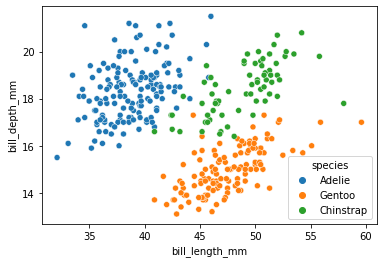

In [109]:
print('culmen_length vs culmen_depth')
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.show()

<AxesSubplot:xlabel='flipper_length_mm', ylabel='species'>

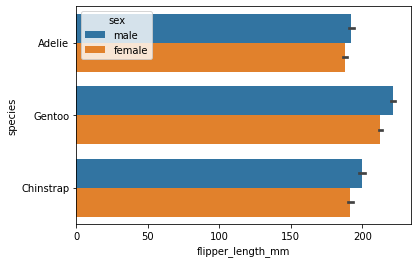

In [110]:
sns.barplot(data=df,x='flipper_length_mm',y='species',hue='sex')

In [111]:
## Similarly Different Plots Can be Drawn this is just for demo-purpose

In [112]:
data.to_csv('D:\Course5i MLops Practice Project\Penguin Classfication\Penguin Classification\source_code\Penguin.csv',mode='w',index=False)

In [113]:
df

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
